In [2]:
import pandas as pd

train = pd.read_csv("/Users/dishabhatnagar/Desktop/Text Mining/spooky-author-identification/train.csv")

In [7]:
test = pd.read_csv('/Users/dishabhatnagar/Desktop/Text Mining/spooky-author-identification/test.csv')


In [3]:
train.head()


,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [4]:
import re
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud, STOPWORDS

import matplotlib.pyplot as plt

In [5]:
print("Train data columns Qty :", len(train.columns), "\n")
print("Train data columns :", train.columns)

Train data columns Qty : 3 

Train data columns : Index(['id', 'text', 'author'], dtype='object')


In [8]:
print("Test data columns Qty :", len(test.columns), "\n")
print("Test data columns :", test.columns)

Test data columns Qty : 2 

Test data columns : Index(['id', 'text'], dtype='object')


In [10]:
train['sentences'] = train.text.transform(lambda x: len(sent_tokenize(x)))

In [12]:
train['words'] = train.text.transform(lambda x: len(word_tokenize(x)))


In [13]:
train['text_length'] = train.text.transform(lambda x: len(x))


In [14]:
test['sentences'] = test.text.transform(lambda x: len(sent_tokenize(x)))
test['words'] = test.text.transform(lambda x: len(word_tokenize(x)))
test['text_length'] = test.text.transform(lambda x: len(x))

In [9]:
text_analize = train.groupby("author")[['sentences','words','text_length']].sum()
text_analize

KeyError: "Columns not found: 'sentences', 'words', 'text_length'"

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ab3c668>,
      dtype=object)

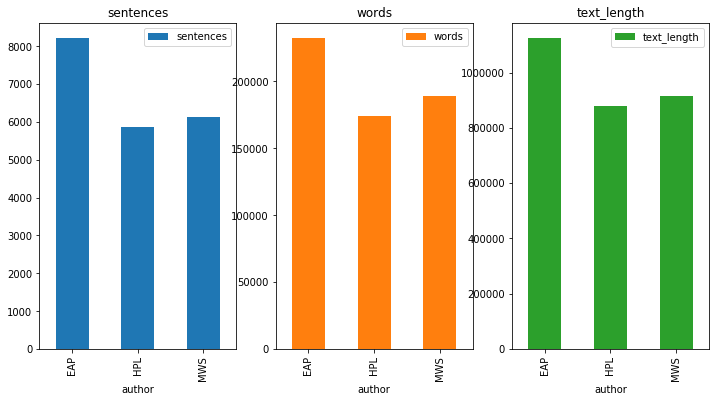

In [19]:
text_analize.plot.bar(subplots = True, layout=(1,3), figsize=(12,6))


In [10]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dishabhatnagar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/dishabhatnagar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
#Natural language processing

# 2.1 Stopword Removal¶

len(stopwords.words('english')), stopwords.words('english')[:5]


(179, ['i', 'me', 'my', 'myself', 'we'])

In [23]:
stopwords.words


<bound method WordListCorpusReader.words of <WordListCorpusReader in '/Users/dishabhatnagar/nltk_data/corpora/stopwords'>>

In [12]:
stemmer = SnowballStemmer('english')

def text_to_words(text):

    # Convert non-English characters to spaces
    letters_only = re.sub('[^a-zA-Z]', ' ', text)

    # Lowercase conversion
    words = letters_only.lower().split()

    # Convert stopwords to sets.
    stops = set(stopwords.words('english'))

    # Remove Stopwords 
    meaningful_words = [w for w in words if not w in stops]

    # Stemming
    stemming_words = [stemmer.stem(w) for w in meaningful_words]

    # Combining with a space-delimited string
    return( ' '.join(stemming_words) )

In [13]:
# 2.3 Improved workflow¶

from multiprocessing import Pool
import numpy as np

In [14]:
def _apply_df(arg):
    df, func, kwargs = arg
    return df.apply(func, **kwargs)

def apply_by_multiprocessing(df, func, **kwargs):
    # Get workers parameter from keyword item
    workers = kwargs.pop('workers')

    # Define a process pool with the number of workers
    pool = Pool(processes = workers)

    # Work by dividing the number of functions and data frames 
    # to be executed by the number of workers
    result = pool.map(_apply_df, [(d, func, kwargs)
            for d in np.array_split(df, workers)])
    pool.close()

    # Combine work
    return pd.concat(list(result))

In [15]:
train['text']

0        This process, however, afforded me no means of...
1        It never once occurred to me that the fumbling...
2        In his left hand was a gold snuff box, from wh...
3        How lovely is spring As we looked from Windsor...
4        Finding nothing else, not even gold, the Super...
5        A youth passed in solitude, my best years spen...
6        The astronomer, perhaps, at this point, took r...
7              The surcingle hung in ribands from my body.
8        I knew that you could not say to yourself 'ste...
9        I confess that neither the structure of langua...
10       He shall find that I can feel my injuries; he ...
11       Here we barricaded ourselves, and, for the pre...
12       Herbert West needed fresh bodies because his l...
13       The farm like grounds extended back very deepl...
14        But a glance will show the fallacy of this idea.
15       He had escaped me, and I must commence a destr...
16       To these speeches they gave, of course, their .

In [15]:
train_clean = apply_by_multiprocessing(train['text'], text_to_words, workers=4)


In [16]:
all_words = train_clean.str.split(expand=True).unstack().value_counts()


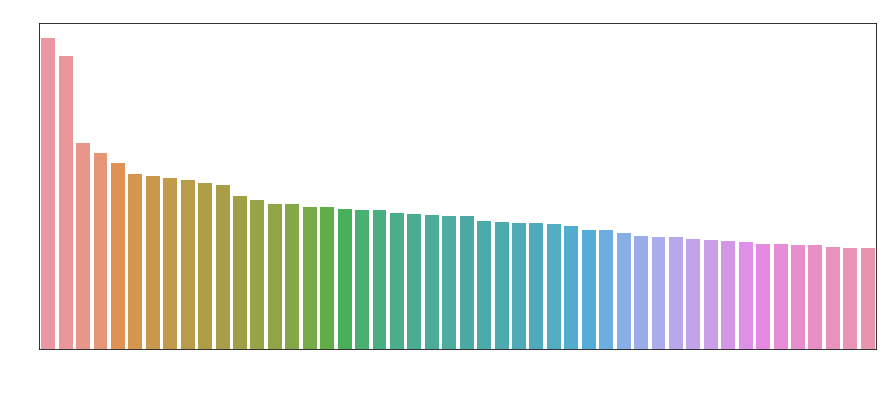

In [19]:
import seaborn as sns

plt.figure(figsize=(15,6))
g = sns.barplot(x = all_words.index.values[2:50],
            y = all_words.values[2:50])
g.set_title('Word frequencies in the train data')
g.xaxis.label.set_color('white')
g.title.set_color('white')
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")
g.tick_params(axis='x', colors='white')
g.tick_params(axis='y', colors='white')
plt.show()


In [21]:
train_clean

0        process howev afford mean ascertain dimens dun...
1                      never occur fumbl might mere mistak
2        left hand gold snuff box caper hill cut manner...
3        love spring look windsor terrac sixteen fertil...
4        find noth els even gold superintend abandon at...
5        youth pass solitud best year spent gentl femin...
6        astronom perhap point took refug suggest non l...
7                                surcingl hung riband bodi
8        knew could say stereotomi without brought thin...
9        confess neither structur languag code govern p...
10       shall find feel injuri shall learn dread reven...
11                                  barricad present secur
12       herbert west need fresh bodi life work reanim ...
13       farm like ground extend back deepli hill almos...
14                                 glanc show fallaci idea
15       escap must commenc destruct almost endless jou...
16       speech gave cours interpret fanci doubt event .

In [22]:
# Classify by author
EAP = train[train['author']=='EAP']
MWS = train[train['author']=='MWS']
HPL = train[train['author']=='HPL']

In [23]:
EAP

,id,text,author,sentences,words,text_length
0,id26305,"This process, however, afforded me no means of...",EAP,1,48,231
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,1,41,200
6,id09674,"The astronomer, perhaps, at this point, took r...",EAP,1,26,128
7,id13515,The surcingle hung in ribands from my body.,EAP,1,9,43
8,id19322,I knew that you could not say to yourself 'ste...,EAP,1,98,488
11,id16607,"Here we barricaded ourselves, and, for the pre...",EAP,1,13,63
14,id17189,But a glance will show the fallacy of this idea.,EAP,1,11,48
16,id08441,"To these speeches they gave, of course, their ...",EAP,1,71,340
18,id14862,I even went so far as to speak of a slightly h...,EAP,1,55,270
20,id11411,Now the net work was not permanently fastened ...,EAP,1,23,111


In [26]:
# Proprocessing text data by author
EAP_clean = apply_by_multiprocessing(EAP['text'], text_to_words, workers=4)
MWS_clean = apply_by_multiprocessing(MWS['text'], text_to_words, workers=4)
HPL_clean = apply_by_multiprocessing(HPL['text'], text_to_words, workers=4)

In [27]:
EAP_clean.head(3)


0    process howev afford mean ascertain dimens dun...
2    left hand gold snuff box caper hill cut manner...
6    astronom perhap point took refug suggest non l...
Name: text, dtype: object

In [29]:
# Number of words
train['num_words'] = train_clean.apply(lambda x: len(str(x).split()))

In [31]:
train['num_uniq_words'] = train_clean.apply(lambda x: len(set(str(x).split())))


In [32]:
train['num_uniq_words']

0        21
1         6
2        18
3        20
4        16
5        40
6        12
7         4
8        41
9        11
10        9
11        3
12        9
13       10
14        4
15       23
16       27
17       15
18       23
19       28
20       10
21       19
22       10
23       40
24        6
25       14
26       43
27       15
28       22
29       14
         ..
19549     7
19550     5
19551    20
19552     8
19553    15
19554    11
19555    14
19556    25
19557     4
19558    16
19559    12
19560     7
19561    30
19562     9
19563     7
19564    10
19565     8
19566     9
19567     4
19568    21
19569     6
19570    18
19571     7
19572    21
19573    14
19574     8
19575     4
19576     9
19577     7
19578     8
Name: num_uniq_words, Length: 19579, dtype: int64

In [39]:
# 3. Vectorization of data¶


In [33]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

In [34]:
# Creating a vectorizer object
vectorizer = CountVectorizer(analyzer = 'word',
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = None,
                             min_df = 2,
                             ngram_range=(1, 3),
                             max_features = 20000
                            )

In [36]:
pipeline = Pipeline([
    ('vect', vectorizer),
])

In [37]:
# Convert train data to vector
X_train = pipeline.fit_transform(train_clean)
X_train

<19579x20000 sparse matrix of type '<class 'numpy.int64'>'
	with 278739 stored elements in Compressed Sparse Row format>

In [38]:
X_train

<19579x20000 sparse matrix of type '<class 'numpy.int64'>'
	with 278739 stored elements in Compressed Sparse Row format>

In [44]:
X_train.shape


(19579, 20000)

In [41]:
vocab = vectorizer.get_feature_names()

# Total number of words
sum_of_word = np.sum(X_train, axis=0)

# Check the total of each word
pd.DataFrame(sum_of_word, columns=vocab, index=['Total'])

,abandon,abaout,abat,abbey,abdic,abdul,abdul alhazr,abernethi,aberr,abey,...,zigzag,zigzag direct,zimmer,zit,zit still,zodiac,zodiac light,zokkar,zokkar olden,zone
Total,48,24,6,5,7,5,5,4,6,3,...,5,2,3,5,2,3,2,3,2,3


In [42]:
# Check vectorized features
pd.DataFrame(X_train[:10].toarray(), columns=vocab).head(30)

,abandon,abaout,abat,abbey,abdic,abdul,abdul alhazr,abernethi,aberr,abey,...,zigzag,zigzag direct,zimmer,zit,zit still,zodiac,zodiac light,zokkar,zokkar olden,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
X_train[:10].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [43]:
# 4. Model¶

test_clean = apply_by_multiprocessing(test['text'], text_to_words, workers=4)


In [44]:
X_test = pipeline.transform(test_clean)


In [45]:
y_train = train.author.map({'EAP' : 0, 'HPL' : 1, 'MWS' : 2})


In [50]:
## 4.2 Modeling¶
##Support Vector Machine

In [47]:
from sklearn.svm import SVC


In [48]:
model_a = SVC(decision_function_shape='ovr', probability=True).fit(X_train, y_train)


/Users/dishabhatnagar/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [54]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [52]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=1)


In [ ]:
score = cross_val_score(model_a,X_train, y_train, cv=k_fold, n_jobs=-1, scoring="accuracy").mean()
print("Score : {}".format(score))